In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [3]:
df = pd.read_csv('Ordinal+Ridge.csv')

In [3]:
df.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Ridge
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119695.642722
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,118142.328347
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,129798.673755


In [4]:
X_ordinal = df.drop(['SalePrice'], axis=1).values
Y_ordinal = df.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, Y_train)
XGB_Score = xgb.score(X_test_scaled, Y_test)

In [17]:
XGB_Score

0.9468350369655337

In [18]:
xgb.feature_importances_

array([7.6595042e-04, 1.1595332e-03, 1.2823282e-03, 6.0716883e-04,
       1.2701992e-03, 3.0632742e-04, 2.8516416e-02, 0.0000000e+00,
       1.1296551e-03, 5.1276479e-04, 1.6320129e-03, 1.0053384e-03,
       7.6173514e-04, 4.1115005e-04, 2.1400717e-03, 3.4608117e-03,
       3.8722828e-03, 7.4877514e-04, 2.4222280e-03, 1.8075003e-03,
       1.4181650e-03, 9.0254046e-04, 8.6974335e-04, 2.2195634e-03,
       7.0120400e-04, 1.1371783e-03, 1.3565674e-03, 1.4827393e-03,
       0.0000000e+00, 6.0003268e-04, 3.9608115e-03, 1.6722523e-03,
       4.1289316e-03, 1.9689454e-03, 2.7393175e-03, 6.8101613e-03,
       1.9411248e-03, 3.9432029e-04, 2.5046589e-03, 5.8315741e-03,
       0.0000000e+00, 5.5386958e-04, 1.0595380e-03, 1.1599137e-03,
       8.3276746e-04, 5.3370893e-03, 3.5349752e-03, 1.8056759e-03,
       1.9158055e-03, 4.0286044e-03, 1.6316425e-03, 2.8355990e-03,
       1.5214344e-02, 2.0442498e-03, 1.8873356e-03, 2.8034139e-03,
       3.1684872e-03, 3.4184593e-03, 1.2310152e-03, 1.3950461e

In [19]:
X_cols = df.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('Ridge', 0.7878299),
 ('LandContour', 0.028516416),
 ('OverallQual', 0.015214344),
 ('FullBath', 0.010443807),
 ('2ndFlrSF', 0.00803128),
 ('GarageType', 0.0068101613),
 ('PavedDrive', 0.005831574),
 ('SaleType', 0.0053370893),
 ('MiscVal', 0.0049941186),
 ('KitchenQual', 0.0041289316),
 ('GrLivArea', 0.0040286044),
 ('CentralAir', 0.0039608115),
 ('1stFlrSF', 0.00390475),
 ('RoofMatl', 0.0038722828),
 ('GarageCars', 0.0036643804),
 ('SaleCondition', 0.0035349752),
 ('RoofStyle', 0.0034608117),
 ('BsmtFinSF1', 0.0034184593),
 ('GarageYrBlt', 0.0032035143),
 ('MasVnrArea', 0.0031684872),
 ('LotArea', 0.002835599),
 ('YearRemodAdd', 0.002803414),
 ('FireplaceQu', 0.0027393175),
 ('GarageArea', 0.0026406397),
 ('EnclosedPorch', 0.002541149),
 ('GarageCond', 0.002504659),
 ('Exterior2nd', 0.002422228),
 ('OpenPorchSF', 0.0023415412),
 ('BsmtQual', 0.0022195634),
 ('BedroomAbvGr', 0.0021601256),
 ('HouseStyle', 0.0021400717),
 ('HalfBath', 0.0020784782),
 ('OverallCond', 0.0020442498),
 (

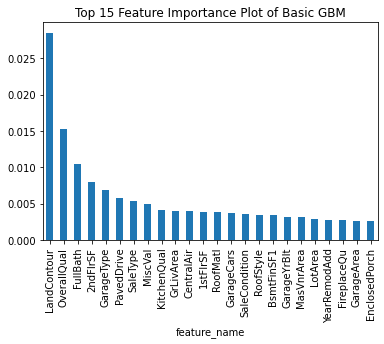

In [20]:
a, b = zip(*sorted_importance[1:25]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [21]:
X_ordinal_scaled = scaler.transform(X_ordinal)
len(X_ordinal_scaled)

2580

In [22]:
predicted_value = xgb.predict(X_ordinal_scaled)

In [23]:
true_value = Y_ordinal

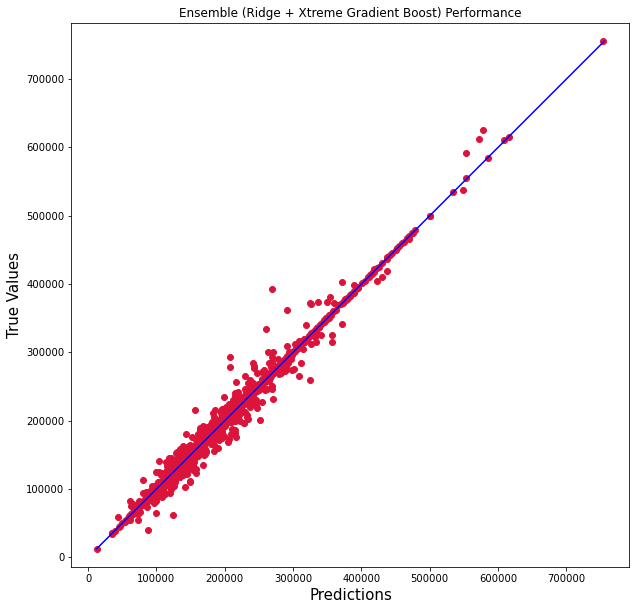

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Ensemble (Ridge + Xtreme Gradient Boost) Performance')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()